# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [14]:
url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/we_fn_use_c_marketing_customer_value_analysis.csv"
df = pd.read_csv(url)

df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [15]:
df.columns


Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [42]:
df.select_dtypes(include=['number']).isnull().sum()




Customer Lifetime Value          0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Total Claim Amount               0
dtype: int64

In [43]:
missing_cols = ['GEOCODE2', 'WEALTH1', 'ADI', 'DMA', 'MSA']
print("Las siguientes columnas no se encuentran en el dataset:", [col for col in missing_cols if col not in df.columns])



Las siguientes columnas no se encuentran en el dataset: ['GEOCODE2', 'WEALTH1', 'ADI', 'DMA', 'MSA']


In [37]:
cols_to_check = ['Income', 'Education', 'Gender', 'Vehicle Class']
df[cols_to_check].isnull().sum()


Income           0
Education        0
Gender           0
Vehicle Class    0
dtype: int64

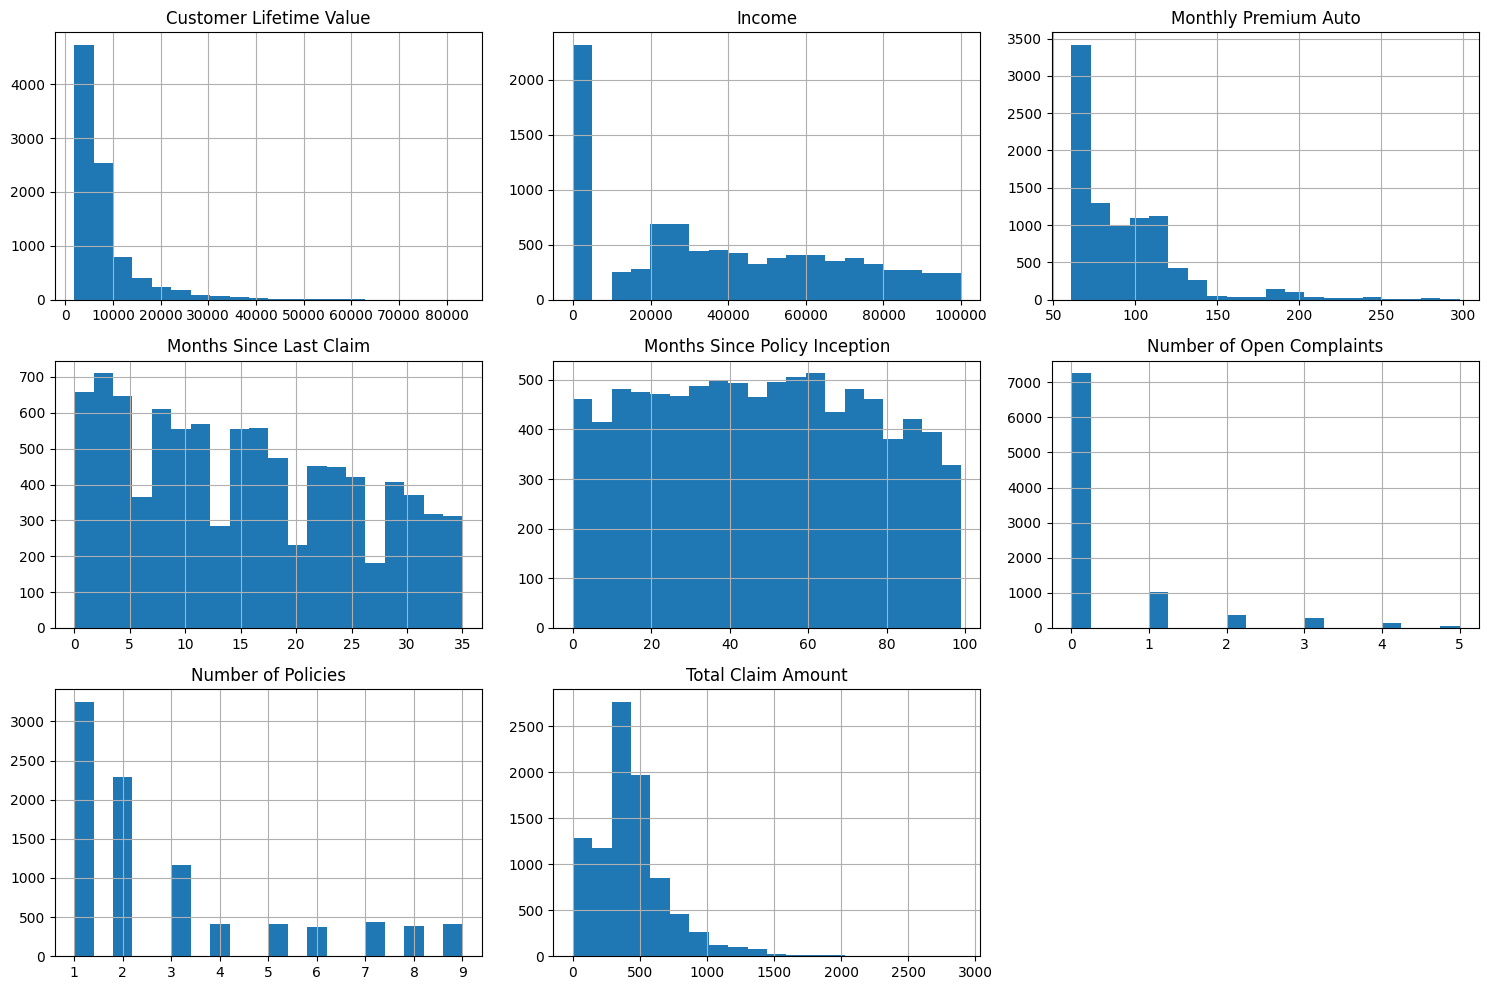

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas de todas las variables numéricas
df.select_dtypes(include='number').hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


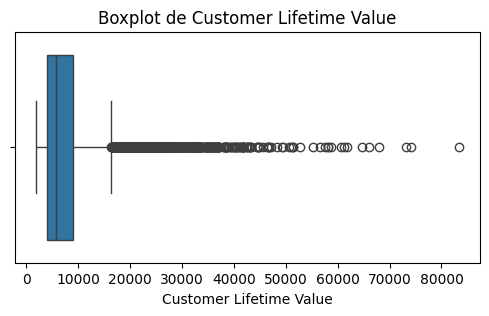

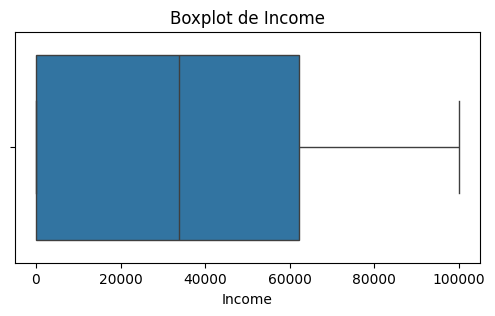

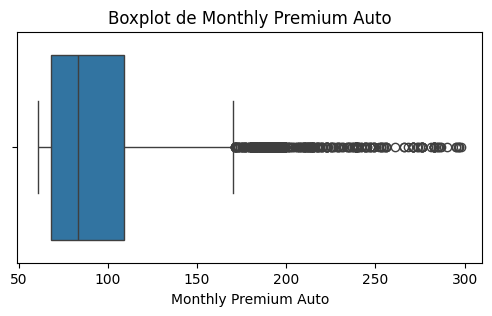

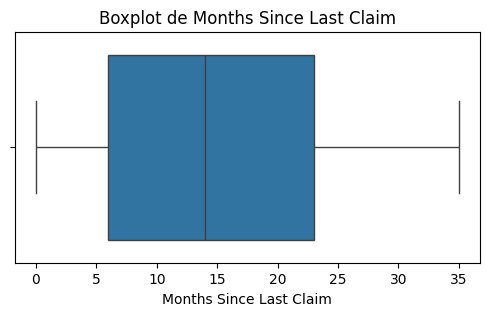

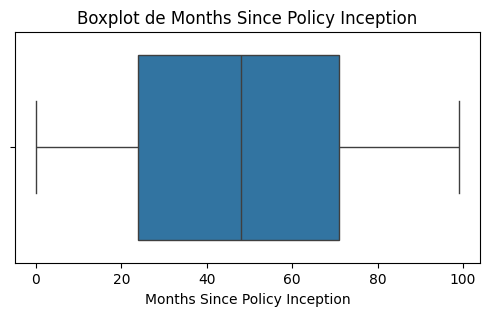

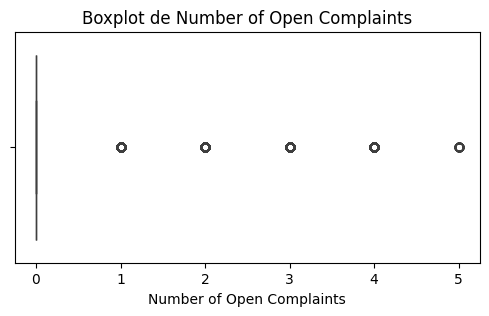

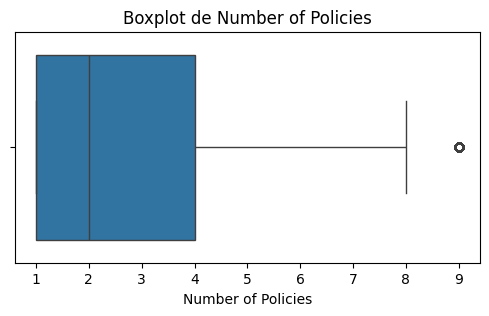

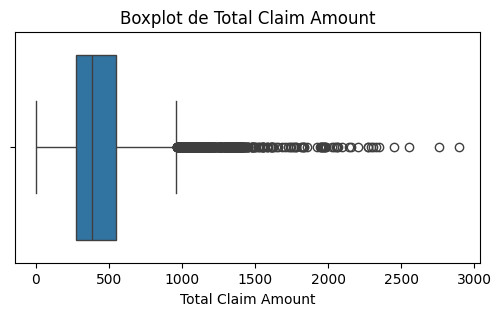

In [45]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


In [46]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f'\n{col}:\n', df[col].value_counts(normalize=True))



Customer:
 Customer
Y167826    0.000109
BU79786    0.000109
QZ44356    0.000109
AI49188    0.000109
WW63253    0.000109
             ...   
WC83389    0.000109
OE15005    0.000109
FV94802    0.000109
BW63560    0.000109
IL66569    0.000109
Name: proportion, Length: 9134, dtype: float64

State:
 State
California    0.344865
Oregon        0.284760
Arizona       0.186446
Nevada        0.096562
Washington    0.087366
Name: proportion, dtype: float64

Response:
 Response
No     0.856799
Yes    0.143201
Name: proportion, dtype: float64

Coverage:
 Coverage
Basic       0.609591
Extended    0.300197
Premium     0.090212
Name: proportion, dtype: float64

Education:
 Education
Bachelor                0.300854
College                 0.293519
High School or Below    0.287059
Master                  0.081125
Doctor                  0.037443
Name: proportion, dtype: float64

Effective To Date:
 Effective To Date
1/10/11    0.021349
1/27/11    0.021239
2/14/11    0.020363
1/26/11    0.019816
1/17/1

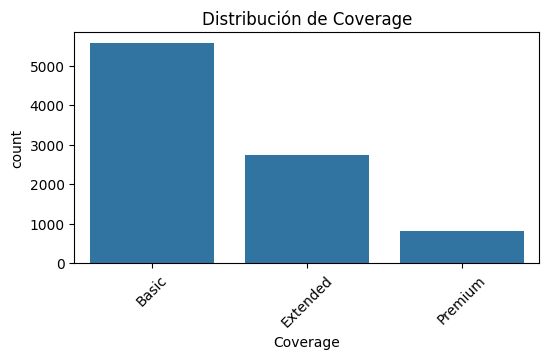

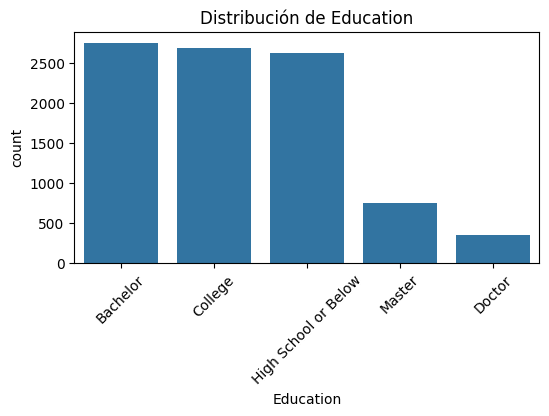

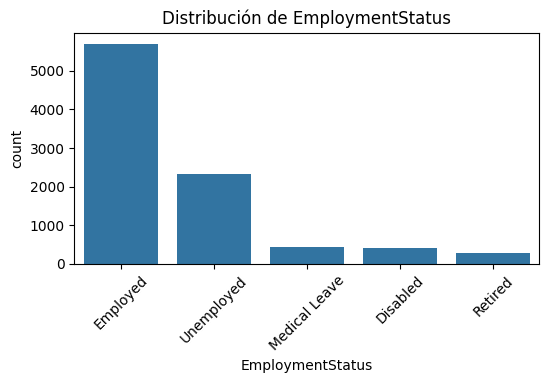

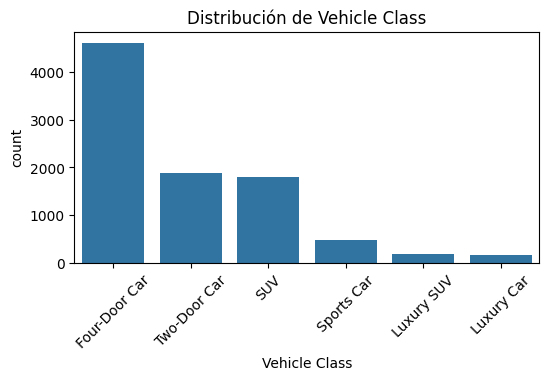

In [48]:
for col in ['Coverage', 'Education', 'EmploymentStatus', 'Vehicle Class']:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()



In [38]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [39]:
X = df_encoded.drop('Response_Yes', axis=1)
y = df_encoded['Response_Yes']


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Precisión: {accuracy:.2%}")


Precisión: 92.06%
